```{admonition} Information
__Section__: Data augmentation  
__Goal__: Understand the principle of data augmentation and get the tools to do it with image datasets.  
__Time needed__: x min  
__Prerequisites__: Introduction about machine learning experiments, basics about image processing
```

# Data augmentation

Data augmentation is a technique used to increase the diversity of a dataset by randomly creating new slightly modified versions of the instances that are already present in the dataset. It is not limited only to image data, however it is probably the easiest to understand with it.

Data augmentation allows to have better data quality in the sense that the data is richer and may give better performance in a machine learning experiment.

On this page, we will follow basic methods for image data augmentation.

More methods exist, some using machine learning to create new images, but are beyond the concept of this course.

## Vertical and horizontal shift

If we want to recognize an object on an image, it is not necessary centered. The object might appear on the left, right, top or bottom of the image, and our model should still be able to recognize it.

This technique creates new images from one images, where the object is shifted horizontally (left-right) or vertically (top-down).

```{toggle} Advanced level
In Python, we use the method [shift](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html) from the library ``scipy``. It allows to shift an array, filling the void with predefined functions. In our case, for the parameters ``mode``, we use the value ``nearest``, producing an image that can look reasonable.

This method only works on a black and white picture, as it cannot handle 3 dimensional arrays.

The table we pass as an argument is the value of the shift in each direction.
```

We can specify the values for the shift as numbers for both directions. A negative value shifts the image to the up or left, a positive value shifts it to the bottom or right. Try to change the values to see how the image shifts differently.

Text(0.5, 1.0, 'Image shifted')

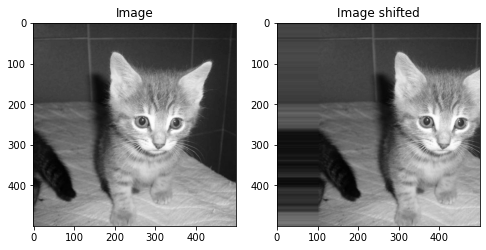

In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io
from skimage.color import rgb2gray

image = io.imread('./data/1.jpg')
image = rgb2gray(image)

shifted = ndimage.shift(image, [0, 100], mode = 'nearest') # here change the values of the shift parameter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Image')
ax2.imshow(shifted, cmap = 'gray')
ax2.set_title('Image shifted')

In [2]:
# Beginner version: cell to hide

import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io
from skimage.color import rgb2gray
import ipywidgets as widgets
from ipywidgets import interact

def plot_shifted(vertical, horizontal):
    image = io.imread('./data/1.jpg')
    image = rgb2gray(image)

    shifted = ndimage.shift(image, [vertical, horizontal], mode = 'nearest')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
    ax1.imshow(image, cmap = 'gray')
    ax1.set_title('Image')
    ax2.imshow(shifted, cmap = 'gray')
    ax2.set_title('Image shifted')

interact(plot_shifted,
         vertical = widgets.IntSlider(
                    value = 0,
                    min = -500,
                    max = 500,
                    step = 1,
                    description = 'Vertical shift: ',
                    disabled = False,
                    continuous_update = False,
                    orientation = 'horizontal',
                    readout = True,
                    readout_format = 'd'
                    ),
         horizontal = widgets.IntSlider(
                    value = 0,
                    min = -500,
                    max = 500,
                    step = 1,
                    description = 'Horizontal shift: ',
                    disabled = False,
                    continuous_update = False,
                    orientation = 'horizontal',
                    readout = True,
                    readout_format = 'd'
                    ),
        )

interactive(children=(IntSlider(value=0, continuous_update=False, description='Vertical shift: ', max=500, min…

<function __main__.plot_shifted(vertical, horizontal)>

## Rotation

The same way as for the shift and the flip, we can rotate the images around their center. Here, the parameter to specify to get different versions of the image is the angle of rotation.

Try to change this angle.

```{toggle} Advanced level
In Python, we can use the function [rotate()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html#scipy.ndimage.rotate) from the ``scipy`` library. The parameter ``mode`` for the way to fill the empty pixels is still there, as for the shift earlier. We keep the value ``nearest``, but feel free to try other values according to the documentation of the function.

The parameter ``reshape`` allows us to create an image wih the same shape (size) as the original image. It is necessary that all images have the same size to use them with the machine learning algorithm.
```

Text(0.5, 1.0, 'Image rotated')

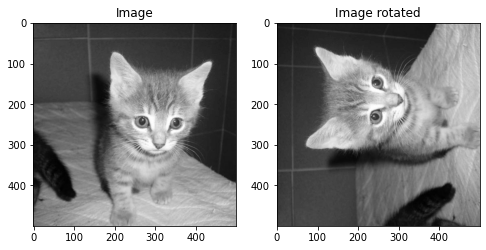

In [3]:
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io
from skimage.color import rgb2gray

image = io.imread('./data/1.jpg')
image = rgb2gray(image)

rotated = ndimage.rotate(image, 90, mode = 'nearest', reshape = False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Image')
ax2.imshow(rotated, cmap = 'gray')
ax2.set_title('Image rotated')

In [4]:
# Beginner version: cell to hide

import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io
from skimage.color import rgb2gray
import ipywidgets as widgets
from ipywidgets import interact

def plot_rotated(angle):
    image = io.imread('./data/1.jpg')
    image = rgb2gray(image)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
    ax1.imshow(image, cmap = 'gray')
    ax1.set_title('Image')

    rotated = ndimage.rotate(image, angle, mode = 'nearest', reshape = False)
    
    ax2.imshow(rotated, cmap = 'gray')
    ax2.set_title('Image rotated')

interact(plot_rotated,
         angle = widgets.IntSlider(
                    value = 0,
                    min = -360,
                    max = 360,
                    step = 1,
                    description = 'Angle of rotation: ',
                    disabled = False,
                    continuous_update = False,
                    orientation = 'horizontal',
                    readout = True,
                    readout_format = 'd'
                    ),
        )

interactive(children=(IntSlider(value=0, continuous_update=False, description='Angle of rotation: ', max=360, …

<function __main__.plot_rotated(angle)>

## Put everything together to augment the dataset

With all those methods, we can create a few more versions of each image in a dataset, with random parameters of shift and rotation.

We decide to create 8 new pictures from 1 picture. This number can be changed as the data scientist wishes.

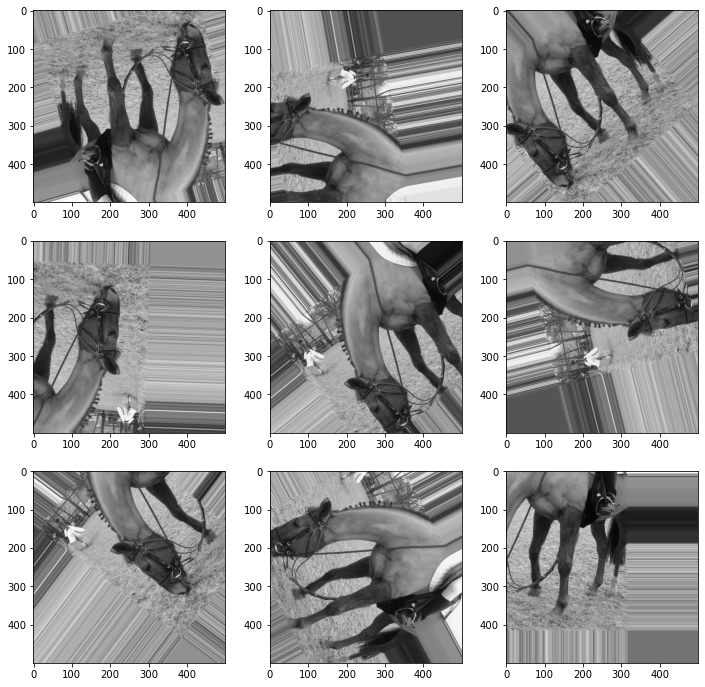

In [32]:
import matplotlib.pyplot as plt
from numpy import random
from scipy import ndimage
from skimage import io
from skimage.color import rgb2gray
import pandas as pd

def augment_image(image):
    image = rgb2gray(image)
    
    images = []
    
    for i in range(1, 19): # create 9 new images
        vertical = random.randint(-200, 200)
        horizontal = random.randint(-200, 200)
        angle =  random.randint(0, 360)
        
        new_image = ndimage.shift(image, [vertical, horizontal], mode = 'nearest')
        new_image = ndimage.rotate(new_image, angle, mode = 'nearest', reshape = False)
        images.append(new_image)
        
    return images

def print_9images(images):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (12, 12))
    ax1.imshow(images[0], cmap = 'gray')
    ax2.imshow(images[1], cmap = 'gray')
    ax3.imshow(images[2], cmap = 'gray')
    ax4.imshow(images[3], cmap = 'gray')
    ax5.imshow(images[4], cmap = 'gray')
    ax6.imshow(images[5], cmap = 'gray')
    ax7.imshow(images[6], cmap = 'gray')
    ax8.imshow(images[7], cmap = 'gray')
    ax9.imshow(images[8], cmap = 'gray')

    
images = pd.read_csv('./2-images.csv')
dataset = []

for index, row in images.iterrows():
    image = io.imread(row['image_path'])
    dataset.append(image)
    new_images = augment_image(image)
    dataset.append(new_images)

print_9images(new_images)

## Try it out on the classification task

Let's again perform the classification task with the raw dataset first, and then with the augmented dataset.

Note that the augmentation of the dataset is using some random values on which we have no influence, so by running the functions several times we might get different results, even if the separation train/test and the model built stay the same, because the augmented images differ every time.

```{toggle} Advanced level
This will be slightly more complicated to run if we want to make a real comparison, because we need the same testing sets in both cases, but an augmented training set, to see if augmentation has an impact on the result.

We cannot use the function ``classify_images()`` that we built before and have to do it by hand.

First, we separate the dataset into training and testing sets. Then, we build the model with the normal training set and launch the classification, before augmenting the training set and building a new model with the augmented training set, and launching the classification one more time.

The code is a little complicated, mainly because we had to transform a lot of data types (lists, dataframes, separations between test and train sets, get the label back, etc). The understanding of the whole code cell is not necessary to understand the point.
```

Accuracy on normal dataset: 0.25


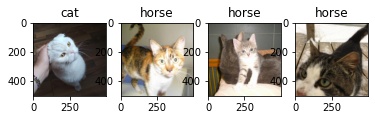

Accuracy on normal dataset: 0.5


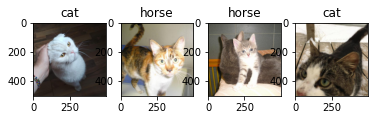

In [36]:
# Classification on normal and augmented dataset and show results

%run 2-functions.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from skimage import io

# Read dataset
images = read_images('./2-images.csv')

# Get hog features
images = images.assign(hog_features = create_hog(images['image']))

# Separate training and testing sets
train, test, y_train, y_test = train_test_split(images[['image_path', 'hog_features', 'image']], # we keep the attribute 'image_path' to
                                                #be able to access the image to check the classification if needed
                                                images['label'],
                                                test_size = 0.2,
                                                random_state = 3)

# Build model on normal training set and get predictions
x_train = np.stack(train['hog_features'].values)
x_test = np.stack(test['hog_features'].values)
random_forest = RandomForestClassifier(n_estimators = 10, max_depth = 7, random_state = 0)
random_forest.fit(x_train, y_train.values)
predictions = random_forest.predict(x_test)
print('Accuracy on normal dataset: ' + str(accuracy_score(predictions, y_test)))

# Print the test images and the predictions
print_results(predictions, test)

# Augment training set
training_set = train.assign(label = y_train.values) # first get the whole set back together
augmented_set = training_set.copy()
for index, row in training_set.iterrows(): # then loop on it to augment each image and add them to the dataset
    image = io.imread(row['image_path'])
    new_images = augment_image(image) # use the function we defined before to create 9 images from 1
    data = {'image': new_images} # the next 4 lines are to create a DataFrame with the augmented images
    df = pd.DataFrame(data)
    #df = df.assign(image_path = row['image_path']) # assign the path of the original image
    df = df.assign(label = row['label']) # assign the label of the original image to the augmented images
    augmented_set = augmented_set.append(df)
    
# Get hog of new images
augmented_set = augmented_set.assign(hog_features = create_hog(augmented_set['image']))
    
# Build model on augmented training set and get predictions
x_train = np.stack(augmented_set['hog_features'].values)
y_train = augmented_set['label']
random_forest = RandomForestClassifier(n_estimators = 10, max_depth = 7, random_state = 0)
random_forest.fit(x_train, y_train.values)
predictions = random_forest.predict(x_test)
print('Accuracy on normal dataset: ' + str(accuracy_score(predictions, y_test)))

# Print the test images and the predictions
print_results(predictions, test)

Note: again, we use a very small dataset. Overall, the performance seems to be better after augmentation, but on 4 pictures it is not necessarily a proof.

## Quiz

In [37]:
from IPython.display import IFrame
IFrame("https://blog.hoou.de/wp-admin/admin-ajax.php?action=h5p_embed&id=70", "959", "309")

## References

This page has been inspired by machinelearningmastery: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/